In [1]:
# 텍스트 분석
# 전처리: 형태소 분리, 품사부착, 불용어 처리, 어간처리, 가중치 도출, (텍스트 표준화 정규화)
# TF, TF-IDF
# 워드 클라우드 및 빈도분석

In [2]:
# TF

In [3]:
# 데이터 불러오기

import pandas as pd

data = pd.read_csv("CNN_Articles_Practice.csv")
data

,Index,Author,Date published,Category,Section,Url,Headline,Description,Keywords,Second headline,...,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50
0,0,"Jacopo Prisco, CNN",2021-07-15 2:46,news,world,https://www.cnn.com/2021/07/14/world/tusimple-...,"There's a shortage of truckers, but TuSimple t...",The e-commerce boom has exacerbated a global t...,"world, There's a shortage of truckers, but TuS...","There's a shortage of truckers, but TuSimple t...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,"Stephanie Bailey, CNN",2021-05-12 7:52,news,world,https://www.cnn.com/2021/05/12/world/ironhand-...,Bioservo's robotic 'Ironhand' could protect fa...,Working in a factory can mean doing the same t...,"world, Bioservo's robotic 'Ironhand' could pro...",A robotic 'Ironhand' could protect factory wor...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,"Words by Stephanie Bailey, video by Zahra Jamshed",2021-06-16 2:51,news,asia,https://www.cnn.com/2021/06/15/asia/swarm-robo...,This swarm of robots gets smarter the more it ...,"In a Hong Kong warehouse, a swarm of autonomou...","asia, This swarm of robots gets smarter the mo...",This swarm of robots gets smarter the more it ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,"Paul R. La Monica, CNN Business",2022-03-15 9:57,business,investing,https://www.cnn.com/2022/03/15/investing/brics...,Russia is no longer an option for investors. T...,"For many years, the world's most popular emerg...","investing, Russia is no longer an option for i...",Russia is no longer an option for investors. T...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7,Reuters,2022-03-15 11:27,business,business,https://www.cnn.com/2022/03/15/business/russia...,Russian energy investment ban part of new EU s...,The European Union formally approved on Tuesda...,"business, Russian energy investment ban part o...",EU bans investment in Russian energy in new sa...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,4346,"Ivana Kottasov찼, CNN",2021-11-08 12:22,news,europe,https://www.cnn.com/2021/11/08/europe/czech-pa...,Communists missing from Czech parliament for t...,When the Czech Republic's 200 newly-elected de...,"europe, Communists missing from Czech parliame...","Communists have now left the Czech parliament,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
396,4347,"George Ramsay, CNN",2021-11-08 17:39,sport,football,https://www.cnn.com/2021/11/08/football/josh-c...,Gay footballer Josh Cavallo says he would be '...,"After becoming the only current, openly gay pl...","football, Gay footballer Josh Cavallo says he ...",Gay footballer Josh Cavallo says he would be '...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
397,4348,"Ben Westcott, CNN",2021-11-07 0:11,news,australia,https://www.cnn.com/2021/11/06/australia/austr...,Koalas are dying from chlamydia and climate ch...,A silent killer is spreading through Australia...,"australia, Koalas are dying from chlamydia and...","Koalas are dying from chlamydia, and climate c...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
398,2133,"Ben Church, CNN",2021-04-25 12:56,sport,football,https://www.cnn.com/2021/04/25/football/englis...,English football is set to boycott social medi...,The world of English football is set to unite ...,"football, English football is set to boycott s...",English football is set to boycott social medi...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# 분석에 사용할 컬럼만 가져오기
# 리스트 : 데이터를 보관하는 기능

text = list(data['Article text'])
text

[' (CNN)Right now, there\'s a shortage of truck drivers in the US and worldwide, exacerbated by the e-commerce boom brought on by the pandemic. One solution to the problem is autonomous trucks, and several companies are in a race to be the first to launch one. Among them is San Diego-based TuSimple.Founded in 2015, TuSimple has completed about 2 million miles of road tests with its 70 prototype trucks across the US, China and Europe. Although these are simply commercially available trucks retrofitted with its technology, TuSimple has deals in place with two of the world\'s largest truck manufacturers -- Navistar in the US and Traton, Volkswagen\'s trucking business, in Europe -- to design and build fully autonomous models, which it hopes to launch by 2024. Photos: The Yara Birkeland is what its builders call the world\'s first zero-emission, autonomous cargo ship. The ship is scheduled to make its first journey between two Norwegian towns before the end of the year. Click through to se

In [5]:
# 뉴스 기사 모두 몇 개?

len(text)

400

In [6]:
#첫번째 기사 확인

text[0]

' (CNN)Right now, there\'s a shortage of truck drivers in the US and worldwide, exacerbated by the e-commerce boom brought on by the pandemic. One solution to the problem is autonomous trucks, and several companies are in a race to be the first to launch one. Among them is San Diego-based TuSimple.Founded in 2015, TuSimple has completed about 2 million miles of road tests with its 70 prototype trucks across the US, China and Europe. Although these are simply commercially available trucks retrofitted with its technology, TuSimple has deals in place with two of the world\'s largest truck manufacturers -- Navistar in the US and Traton, Volkswagen\'s trucking business, in Europe -- to design and build fully autonomous models, which it hopes to launch by 2024. Photos: The Yara Birkeland is what its builders call the world\'s first zero-emission, autonomous cargo ship. The ship is scheduled to make its first journey between two Norwegian towns before the end of the year. Click through to see

In [7]:
# 형태소 분리, 품사부착

In [8]:
import nltk
from nltk.tag import pos_tag
from nltk import word_tokenize

import nltk
nltk.download('punkt_tab')

import nltk
nltk.download('averaged_perceptron_tagger_eng')

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

words = word_tokenize(text[0])
pos_tag(words)

# NNP : 고유명사
# VB : 동사
# VBP : 동사 현재형
# TO : to전치사
# NN : 명사
# DT : 관형사

# ex. ('Greater', 'NNP') => i[0] = 단어 / i[1] = 품사


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


[('(', '('),
 ('CNN', 'NNP'),
 (')', ')'),
 ('Right', 'RB'),
 ('now', 'RB'),
 (',', ','),
 ('there', 'EX'),
 ("'s", 'VBZ'),
 ('a', 'DT'),
 ('shortage', 'NN'),
 ('of', 'IN'),
 ('truck', 'NN'),
 ('drivers', 'NNS'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('US', 'NNP'),
 ('and', 'CC'),
 ('worldwide', 'NN'),
 (',', ','),
 ('exacerbated', 'VBN'),
 ('by', 'IN'),
 ('the', 'DT'),
 ('e-commerce', 'NN'),
 ('boom', 'NN'),
 ('brought', 'VBN'),
 ('on', 'IN'),
 ('by', 'IN'),
 ('the', 'DT'),
 ('pandemic', 'NN'),
 ('.', '.'),
 ('One', 'CD'),
 ('solution', 'NN'),
 ('to', 'TO'),
 ('the', 'DT'),
 ('problem', 'NN'),
 ('is', 'VBZ'),
 ('autonomous', 'JJ'),
 ('trucks', 'NNS'),
 (',', ','),
 ('and', 'CC'),
 ('several', 'JJ'),
 ('companies', 'NNS'),
 ('are', 'VBP'),
 ('in', 'IN'),
 ('a', 'DT'),
 ('race', 'NN'),
 ('to', 'TO'),
 ('be', 'VB'),
 ('the', 'DT'),
 ('first', 'JJ'),
 ('to', 'TO'),
 ('launch', 'VB'),
 ('one', 'CD'),
 ('.', '.'),
 ('Among', 'IN'),
 ('them', 'PRP'),
 ('is', 'VBZ'),
 ('San', 'NNP'),
 ('Diego-based

In [9]:
# 불용어 처리
#stop = ['the', 'in', 'of', 'at', 'be', '%']
#하나씩 입력함 -> 불편
#타인이 정리해놓은 불용어 세트 사용하면 편함

In [10]:
f= open("English_stop_words.txt", 'rt')
stop = f.read().split('\n')
f.close()

In [11]:
from tqdm import tqdm # FOR문 진행사항 체크용

from nltk.stem import WordNetLemmatizer # 어간처리용 라이브러리

nltk.download('wordnet')
nltk.download('omw-1.4')

lm = WordNetLemmatizer()

total = [] # 모든 뉴스기사의 명사들을 여기에 넣어놓기위해서

for i in tqdm(text): # TEXT를 하나하나 가져와라.
    try:
        w = word_tokenize(i)
    except:
        continue
  # print(w)

    for j in pos_tag(w): # j = ex. ('hardship', 'NN')
      # print(j)

      # 선택하고 싶은 형태소 지정
        if j[1] in ['NNP', 'NN'] and j[0] not in stop:
            total.append(j[0])
        elif j[1] == 'VB' and j[0] not in stop:
          # VB는 동사이니 어간처리를 해 주는 것 (running, runs, ran -> run)
            total.append(lm.lemmatize(j[0], pos='v'))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
100%|██████████| 400/400 [00:18<00:00, 22.14it/s]


In [12]:
total # NNP, NN, 어간처리 된 VB

['CNN',
 'shortage',
 'truck',
 'US',
 'worldwide',
 'e-commerce',
 'boom',
 'pandemic',
 'solution',
 'race',
 'launch',
 'San',
 'TuSimple.Founded',
 'TuSimple',
 'road',
 'prototype',
 'US',
 'China',
 'Europe',
 'technology',
 'TuSimple',
 'truck',
 'Navistar',
 'US',
 'Traton',
 'Volkswagen',
 'trucking',
 'business',
 'Europe',
 'design',
 'build',
 'launch',
 'Yara',
 'Birkeland',
 'zero-emission',
 'cargo',
 'ship',
 'ship',
 'journey',
 'Click',
 'transport',
 'transform',
 'Caption',
 'rendering',
 'Oceanbird',
 'car',
 'carrier',
 'carbon',
 '%',
 'car',
 'carrier.Hide',
 'Caption',
 'maritime',
 'startup',
 'Zeabuz',
 'ferry',
 'rendering',
 'revive',
 'Caption',
 'China',
 'Maglev',
 'high-speed',
 'train',
 'production',
 'Qingdao',
 'China',
 'Shandong',
 'Province',
 'July',
 'speed',
 'hour',
 'ground',
 'vehicle',
 'Hide',
 'Caption',
 'hour',
 'Hyperloop',
 'replacement',
 'Dutch',
 'company',
 'Hardt',
 'rendering',
 'Hyperloop',
 'facility',
 'Europe',
 'Caption',


In [13]:
# 빈도분석

dic = {}

for i in total:
  if i not in dic:
    dic[i] = 1
  else:
    dic[i] += 1

dic

{'CNN': 766,
 'shortage': 6,
 'truck': 14,
 'US': 174,
 'worldwide': 7,
 'e-commerce': 2,
 'boom': 1,
 'pandemic': 64,
 'solution': 16,
 'race': 73,
 'launch': 12,
 'San': 19,
 'TuSimple.Founded': 1,
 'TuSimple': 15,
 'road': 25,
 'prototype': 1,
 'China': 141,
 'Europe': 154,
 'technology': 14,
 'Navistar': 1,
 'Traton': 1,
 'Volkswagen': 3,
 'trucking': 2,
 'business': 70,
 'design': 8,
 'build': 17,
 'Yara': 1,
 'Birkeland': 1,
 'zero-emission': 2,
 'cargo': 3,
 'ship': 5,
 'journey': 28,
 'Click': 1,
 'transport': 10,
 'transform': 5,
 'Caption': 284,
 'rendering': 4,
 'Oceanbird': 1,
 'car': 23,
 'carrier': 10,
 'carbon': 22,
 '%': 202,
 'carrier.Hide': 1,
 'maritime': 2,
 'startup': 5,
 'Zeabuz': 1,
 'ferry': 2,
 'revive': 1,
 'Maglev': 1,
 'high-speed': 1,
 'train': 21,
 'production': 11,
 'Qingdao': 1,
 'Shandong': 1,
 'Province': 1,
 'July': 37,
 'speed': 10,
 'hour': 19,
 'ground': 26,
 'vehicle': 11,
 'Hide': 34,
 'Hyperloop': 3,
 'replacement': 5,
 'Dutch': 18,
 'company': 

In [14]:
# 빈도분석 결과 저장

df = pd.DataFrame({
    'word' : dic.keys(),
    'freq' : dic.values()
})
df.to_excel('Frequency_results.xlsx')
df = df.sort_values(by='freq', ascending=False) # 내림차순 정렬
df

,word,freq
0,CNN,766
3683,border,525
394,team,451
203,time,408
466,game,372
...,...,...
7093,Jae-in,1
7092,Moon,1
7090,Eindhoven,1
7089,PSV,1


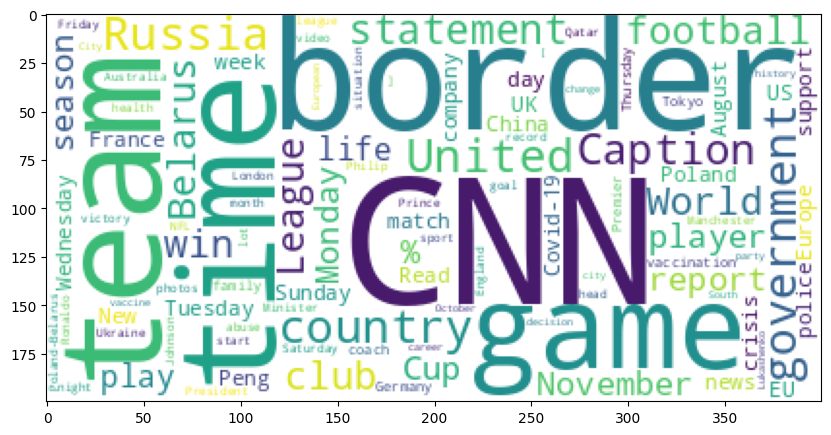

In [15]:
# 워드 클라우드

from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color = 'white')
cloud = wc.generate_from_frequencies(dic)

plt.figure(figsize = (10, 10))
plt.imshow(cloud)

In [16]:
#######################################################################3

In [17]:
# TF-IDF 적용

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

text = data['Article text'].dropna() # DTM
cv = CountVectorizer()
dtm = cv.fit_transform(text)

In [19]:
dtm_array = dtm.toarray()
pd.DataFrame(dtm_array, columns = cv.get_feature_names_out())

,00,000,004,007,01,015竊,02,021,03,04,...,혻cnn,혻the,혻this,혻혻la,횁lvaro,횁ngel,횋ric,횜sterreich,횜vp,힋entjo큄t
0,0,10,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
396,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
397,0,4,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
398,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
from sklearn.feature_extraction.text import TfidfTransformer

In [21]:
import nltk
from nltk.tag import pos_tag
from nltk import word_tokenize

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

#words = word_tokenize(text[0])
#pos_tag(words)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [22]:
# 불용어 처리
#stop = ['the', 'in', 'of', 'at', 'be', '%']
f= open("English_stop_words.txt", 'rt')
stop = f.read().split('\n')
f.close()

In [23]:
from tqdm import tqdm # FOR문 진행사항 체크용

from nltk.stem import WordNetLemmatizer # 어간처리용 라이브러리

nltk.download('wordnet')
nltk.download('omw-1.4')

lm = WordNetLemmatizer()


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [24]:
def tokenize(text):
    # retokenize = RegexpTokenizer("[\w]{2,}") # 패턴
    # text = retokenize.tokenize(text) # 3번째 뉴스 기사

    w = word_tokenize(text)

    total = []
    for i in pos_tag(w):
        if i[1] == 'VB' and i[0] not in stop:
           a = lm.lemmatize(i[0], pos='v')
           total.append(a)
        elif i[1] in ['NNP', 'NN'] and i[0] not in stop:
           total.append(i[0])

    return total

In [25]:
total

['CNN',
 'shortage',
 'truck',
 'US',
 'worldwide',
 'e-commerce',
 'boom',
 'pandemic',
 'solution',
 'race',
 'launch',
 'San',
 'TuSimple.Founded',
 'TuSimple',
 'road',
 'prototype',
 'US',
 'China',
 'Europe',
 'technology',
 'TuSimple',
 'truck',
 'Navistar',
 'US',
 'Traton',
 'Volkswagen',
 'trucking',
 'business',
 'Europe',
 'design',
 'build',
 'launch',
 'Yara',
 'Birkeland',
 'zero-emission',
 'cargo',
 'ship',
 'ship',
 'journey',
 'Click',
 'transport',
 'transform',
 'Caption',
 'rendering',
 'Oceanbird',
 'car',
 'carrier',
 'carbon',
 '%',
 'car',
 'carrier.Hide',
 'Caption',
 'maritime',
 'startup',
 'Zeabuz',
 'ferry',
 'rendering',
 'revive',
 'Caption',
 'China',
 'Maglev',
 'high-speed',
 'train',
 'production',
 'Qingdao',
 'China',
 'Shandong',
 'Province',
 'July',
 'speed',
 'hour',
 'ground',
 'vehicle',
 'Hide',
 'Caption',
 'hour',
 'Hyperloop',
 'replacement',
 'Dutch',
 'company',
 'Hardt',
 'rendering',
 'Hyperloop',
 'facility',
 'Europe',
 'Caption',


In [26]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

vect = CountVectorizer(tokenizer = tokenize)
transformer = TfidfTransformer()

Fulltext = list(data['Article text'].dropna())

X = vect.fit_transform(Fulltext)
tfidf = transformer.fit_transform(X)
tfidf

/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 40153 stored elements and shape (400, 11309)>

In [27]:
TfIdf_Result = pd.DataFrame(tfidf.toarray(), columns = vect.get_feature_names_out())
TfIdf_Result.to_csv("TfIdf_Result.csv")
#TfIdf_Result.to_excel("TfIdf_Result.xlsx")
TfIdf_Result

,%,'all,'be,'big,'boxing,'concealment,'disappearance,'diversity,'drop,'gift,...,"짙60,000",짙70,칊s,칢tate,칣he,탈aryn,횁ngel,횜sterreich,횜vp,힋entjo큄t
0,0.094740,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.046770,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.077031,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
396,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
397,0.070264,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
398,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
TfIdf_Freq = TfIdf_Result.sum().sort_values(ascending=False)
TfIdf_Freq

,0
team,12.059353
border,11.016669
game,10.337102
cnn,9.096035
league,8.604672
...,...
벑,0.008164
벒,0.008164
벜,0.008164
벥,0.008164


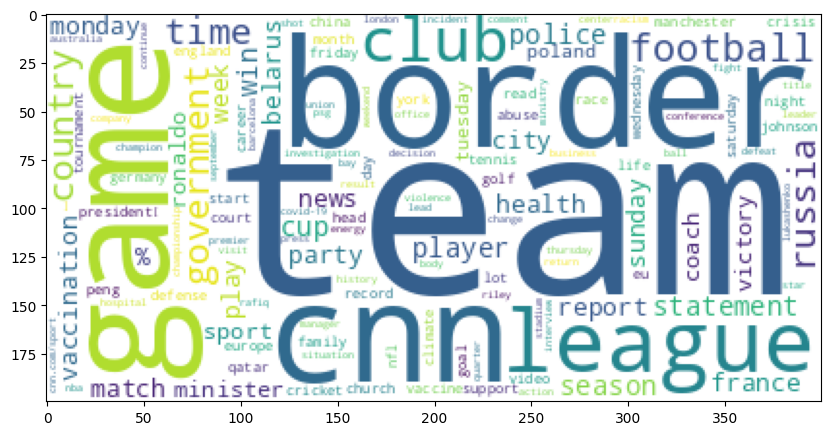

In [29]:
dic2 = {}

for i,j in zip(TfIdf_Freq.index, TfIdf_Freq):
    dic2[i] = j

plt.figure(figsize = (10, 10))
cloud.generate_from_frequencies(dic2)
plt.imshow(cloud)